<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/ML_5_9_Mikhaylov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

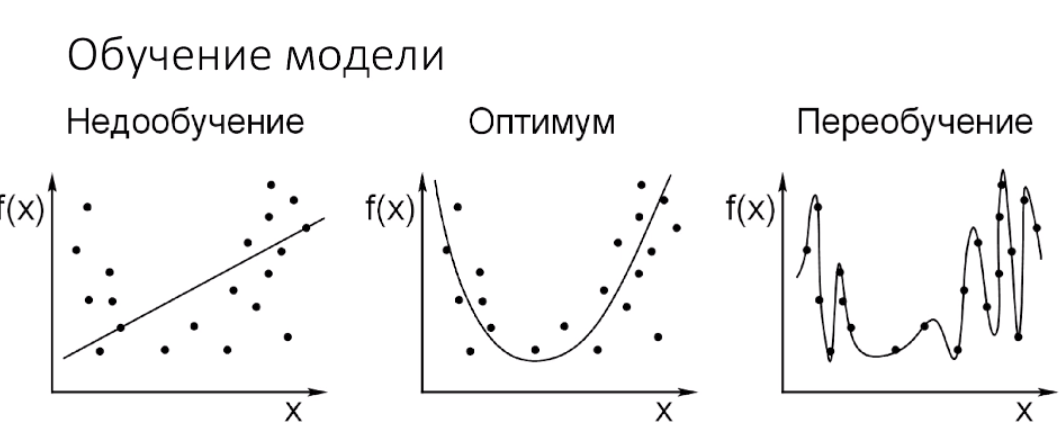

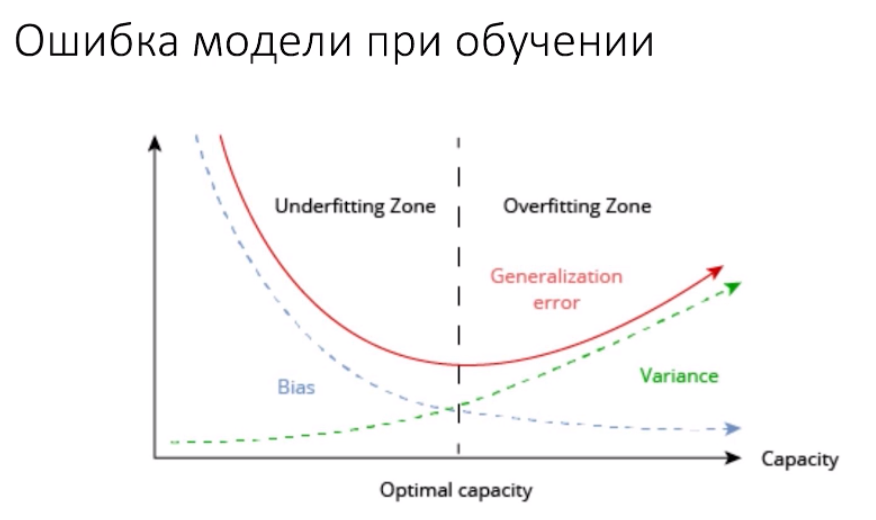

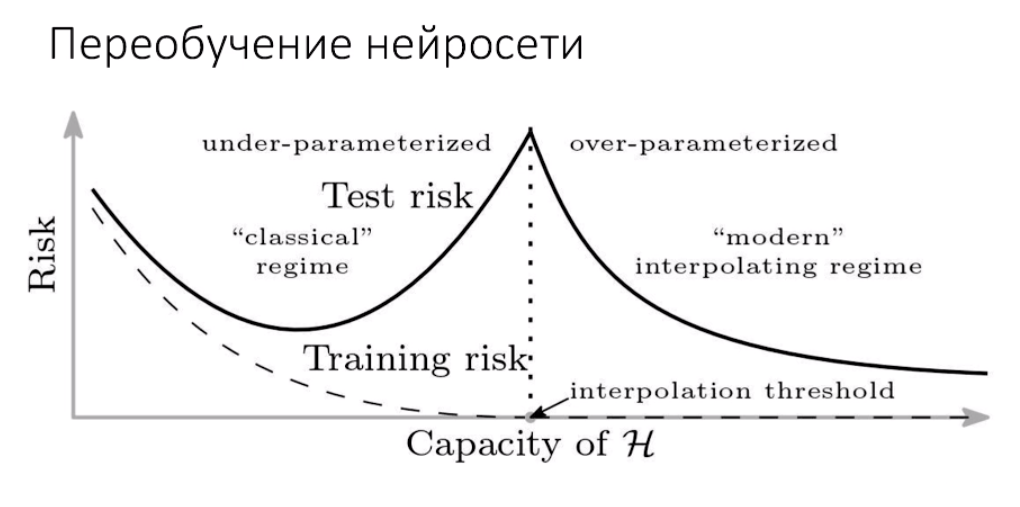

практикум

переобученная модель

In [35]:
import numpy as np
import pandas as pd

In [36]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/energy_2.csv')
print(data)

                timestamp  meter_reading  air_temperature  cloud_coverage  \
0     2016-01-30 08:00:00        43.6839              8.3             0.0   
1     2016-01-31 05:00:00        37.5408             12.8             0.0   
2     2016-01-31 17:00:00        52.5571             20.6             0.0   
3     2016-04-08 14:00:00        59.3827             21.7             2.0   
4     2016-05-01 19:00:00       448.0000             31.1             0.0   
...                   ...            ...              ...             ...   
5406  2016-12-31 19:00:00       232.0710             22.8             0.0   
5407  2016-12-31 20:00:00       189.0690             23.3             0.0   
5408  2016-12-31 21:00:00       169.9580             23.3             0.0   
5409  2016-12-31 22:00:00       169.9580             22.8             0.0   
5410  2016-12-31 23:00:00       175.4180             20.6             0.0   

      dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_speed  \

In [37]:
data.dtypes

timestamp              object
meter_reading         float64
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_speed            float64
air_temperature1      float64
wind_direction_sin    float64
wind_direction_cos    float64
hour                    int64
dtype: object

преобразуем в день

In [38]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['day'] = data['timestamp'].dt.day
print(data.head())

            timestamp  meter_reading  air_temperature  cloud_coverage  \
0 2016-01-30 08:00:00        43.6839              8.3             0.0   
1 2016-01-31 05:00:00        37.5408             12.8             0.0   
2 2016-01-31 17:00:00        52.5571             20.6             0.0   
3 2016-04-08 14:00:00        59.3827             21.7             2.0   
4 2016-05-01 19:00:00       448.0000             31.1             0.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_speed  \
0              6.1                0.0              1019.0         2.1   
1             10.0                0.0              1021.9         0.0   
2             11.7                0.0              1020.9         1.5   
3             14.4                0.0              1015.1         3.1   
4             17.2                0.0              1016.1         4.1   

   air_temperature1  wind_direction_sin  wind_direction_cos  hour  day  
0              -2.3           -0.642788          

In [39]:
data.to_csv("/content/drive/MyDrive/Colab Notebooks/energy_3.csv")

построение базовой модели

In [40]:
# среднее значение и его ошибка
model = float(data['meter_reading'].mean())
err = np.mean(np.abs(data['meter_reading'] - model))
print('модель: {0:.4},'.format(model),
  'ошибка модели общее среднее {0:.4}%,'.format(100*err/model)
  )

модель: 237.7, ошибка модели общее среднее 15.17%,


строим модель по 31 дню месяцу

In [41]:
data31 =  data.loc[data['day'] == 31]
print(data31.head())

              timestamp  meter_reading  air_temperature  cloud_coverage  \
1   2016-01-31 05:00:00        37.5408             12.8             0.0   
2   2016-01-31 17:00:00        52.5571             20.6             0.0   
251 2016-05-31 00:00:00       178.1480             26.7             6.0   
252 2016-05-31 01:00:00       174.0530             26.1             0.0   
253 2016-05-31 02:00:00       176.7830             25.6             0.0   

     dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_speed  \
1               10.0                0.0              1021.9         0.0   
2               11.7                0.0              1020.9         1.5   
251             19.4                0.0              1014.2         2.6   
252             19.4                0.0              1014.5         2.6   
253             20.0                0.0              1015.7         4.6   

     air_temperature1  wind_direction_sin  wind_direction_cos  hour  day  
1                -1.1  

In [42]:
model31 = float(data31['meter_reading'].mean())
err31 = np.mean(np.abs(data31['meter_reading'] - model31))
print('модель: {0:.4},'.format(model31),
  'ошибка модели среднее по дню {0:.4}%,'.format(100*err31/model31),
  'ошибка базовой модели общее среднее {0:.4}%'.format(100*err/model))

модель: 219.4, ошибка модели среднее по дню 17.77%, ошибка базовой модели общее среднее 15.17%


вывод - точность модели падает. переучилась

**ЗАДАНИЕ**

1.В чём суть недообученной модели и переобученной модели?

Недообученная модель сразу выдаёт довольно большую дисперсию ошибок, которые значительно превышают заданную нами погрешность. При этом следует продолжить её обучать, отсекая, например, шумовые входные данные, оптимизируя алгоритм обучения, фильтрую те значения, которые вносят наибольший шум, но не так существенны и так далее, она не способна эффективно аппроксимировать реальные зависимости в данных. Это происходит, когда в модели недостаточно параметров или когда набор данных недостаточно большой, чтобы модель могла извлечь из него полезные закономерности. В результате модель будет неспособна делать точные предсказания на новых данных, так как она не сможет уловить важные свойства обучающей выборки.

При переобученной модели ситуация противоположная - результат предсказания на тестовых значениях может достигать 100% точности, однако, при малейшем изменении входных параметров, может возникнуть довольно серьёзная ошибка, которая будет существенно отличаться от оптимальной модели обучения. Она наоборот, слишком сильно адаптируется к обучающим данным, запоминая их, а не выявляя общие закономерности. Это может произойти, если в модели слишком много параметров или если набор данных содержит много шума или недостаточно разнообразен. В результате переобучения модель становится неэффективной для новых данных, поскольку она запоминает особенности конкретных наблюдений, а не обобщает закономерности в данных.

2.Объясните, почему, казалось бы, точные прогнозы переобученной модели нежелательны, по сравнению с оптимальной, которая демонстрирует больший разброс по ошибкам?

Переобученная модель - это модель, которая слишком близко подстроилась под обучающую выборку, не обладая при этом достаточной способностью к обобщению новых данных. Она запоминает особенности и шум обучающей выборки вместо выявления общих закономерностей, которые позволили бы ей корректно работать на новых данных. В результате переобученная модель дает точные, но не реалистичные прогнозы на тестовых данных.

Оптимальная модель, в свою очередь, показывает больший разброс ошибок, так как она способна учитывать не только особенности обучающей выборки, но и случайные отклонения или выбросы, которые могут быть нехарактерными для целевой переменной. Это позволяет ей давать более надежные и менее точные предсказания, которые лучше отражают реальную ситуацию.

В общем случае, предпочтение отдается оптимальной модели, так как ее предсказания более реалистичны и надежны, даже если они не такие точные, как у переобученной модели.



1. Расчитать ошибку всех моделей по дню (1-31)

In [43]:
#data0 = data.loc[data['day'] == 0]
data1 = data.loc[data['day'] == 1]
data2 = data.loc[data['day'] == 2]
data3 = data.loc[data['day'] == 3]
data4 = data.loc[data['day'] == 4]
data5 = data.loc[data['day'] == 5]
data6 = data.loc[data['day'] == 6]
data7 = data.loc[data['day'] == 7]
data8 = data.loc[data['day'] == 8]
data9 = data.loc[data['day'] == 9]
data10 = data.loc[data['day'] == 10]
data11 = data.loc[data['day'] == 11]
data12 = data.loc[data['day'] == 12]
data13 = data.loc[data['day'] == 13]
data14 = data.loc[data['day'] == 14]
data15 = data.loc[data['day'] == 15]
data16 = data.loc[data['day'] == 16]
data17 = data.loc[data['day'] == 17]
data18 = data.loc[data['day'] == 18]
data19 = data.loc[data['day'] == 19]
data20 = data.loc[data['day'] == 20]
data21 = data.loc[data['day'] == 21]
data22 = data.loc[data['day'] == 22]
data23 = data.loc[data['day'] == 23]
data24 = data.loc[data['day'] == 24]
data25 = data.loc[data['day'] == 25]
data26 = data.loc[data['day'] == 26]
data27 = data.loc[data['day'] == 27]
data28 = data.loc[data['day'] == 28]
data29 = data.loc[data['day'] == 29]
data30 = data.loc[data['day'] == 30]
data31 = data.loc[data['day'] == 31]

In [44]:
#model0 = float(data0['meter_reading'].mean())
model1 = float(data1['meter_reading'].mean())
model2 = float(data2['meter_reading'].mean())
model3 = float(data3['meter_reading'].mean())
model4 = float(data4['meter_reading'].mean())
model5 = float(data5['meter_reading'].mean())
model6 = float(data6['meter_reading'].mean())
model7 = float(data7['meter_reading'].mean())
model8 = float(data8['meter_reading'].mean())
model9 = float(data9['meter_reading'].mean())
model10 = float(data10['meter_reading'].mean())
model11 = float(data11['meter_reading'].mean())
model12 = float(data12['meter_reading'].mean())
model13 = float(data13['meter_reading'].mean())
model14 = float(data14['meter_reading'].mean())
model15 = float(data15['meter_reading'].mean())
model16 = float(data16['meter_reading'].mean())
model17 = float(data17['meter_reading'].mean())
model18 = float(data18['meter_reading'].mean())
model19 = float(data19['meter_reading'].mean())
model20 = float(data20['meter_reading'].mean())
model21 = float(data21['meter_reading'].mean())
model22 = float(data22['meter_reading'].mean())
model23 = float(data23['meter_reading'].mean())
model24 = float(data24['meter_reading'].mean())
model25 = float(data25['meter_reading'].mean())
model26 = float(data26['meter_reading'].mean())
model27 = float(data27['meter_reading'].mean())
model28 = float(data28['meter_reading'].mean())
model29 = float(data29['meter_reading'].mean())
model30 = float(data30['meter_reading'].mean())
model31 = float(data31['meter_reading'].mean())

In [45]:
#err0 = np.mean(np.abs(data0['meter_reading'] - model0))
err1 = np.mean(np.abs(data1['meter_reading'] - model1))
err2 = np.mean(np.abs(data2['meter_reading'] - model2))
err3 = np.mean(np.abs(data3['meter_reading'] - model3))
err4 = np.mean(np.abs(data4['meter_reading'] - model4))
err5 = np.mean(np.abs(data5['meter_reading'] - model5))
err6 = np.mean(np.abs(data6['meter_reading'] - model6))
err7 = np.mean(np.abs(data7['meter_reading'] - model7))
err8 = np.mean(np.abs(data8['meter_reading'] - model8))
err9 = np.mean(np.abs(data9['meter_reading'] - model9))
err10 = np.mean(np.abs(data10['meter_reading'] - model10))
err11 = np.mean(np.abs(data11['meter_reading'] - model11))
err12 = np.mean(np.abs(data12['meter_reading'] - model12))
err13= np.mean(np.abs(data13['meter_reading'] - model13))
err14 = np.mean(np.abs(data14['meter_reading'] - model14))
err15 = np.mean(np.abs(data15['meter_reading'] - model15))
err16 = np.mean(np.abs(data15['meter_reading'] - model16))
err17 = np.mean(np.abs(data16['meter_reading'] - model17))
err18 = np.mean(np.abs(data18['meter_reading'] - model18))
err19 = np.mean(np.abs(data19['meter_reading'] - model19))
err20 = np.mean(np.abs(data20['meter_reading'] - model20))
err21 = np.mean(np.abs(data21['meter_reading'] - model21))
err22 = np.mean(np.abs(data22['meter_reading'] - model22))
err23 = np.mean(np.abs(data23['meter_reading'] - model23))
err24 = np.mean(np.abs(data24['meter_reading'] - model24))
err25 = np.mean(np.abs(data25['meter_reading'] - model25))
err26 = np.mean(np.abs(data26['meter_reading'] - model26))
err27 = np.mean(np.abs(data27['meter_reading'] - model27))
err28 = np.mean(np.abs(data28['meter_reading'] - model28))
err29 = np.mean(np.abs(data29['meter_reading'] - model29))
err30 = np.mean(np.abs(data30['meter_reading'] - model30))
err31 = np.mean(np.abs(data28['meter_reading'] - model31))

2. Вычислить ошибку ансамбля: среднюю ошибку всех моделей по дню. Сравнить её с ошибкой ансамбля моделей по часам

In [48]:
# форомируем словарь
err_day =  {'err':[err1, err2, err3,err4,err5,err6,err7,err8,err9,err10,err11,err12,err13,err14,err15,err16,err17,err18,err19,err20,err21,err22,err23,err24,err25,err26,err27,err28,err29,err30,err31]
             }

#Преобразуем в Pandas DataFrame
err_day = pd.DataFrame(err_day)

#запишем ошибки
err_day['err'] = err_day['err'].apply(lambda x: 100*x/model)

print(err_day)


          err
0   12.582378
1   11.042976
2   11.168006
3   13.939484
4   12.853018
5   10.971392
6    9.983781
7   21.532425
8   20.464171
9   21.010692
10  23.903876
11  24.916967
12  18.587036
13  13.007053
14  16.491832
15  16.438536
16  16.655925
17  18.170506
18  16.155555
19  13.936246
20  14.155998
21  16.308749
22  14.119007
23  11.090361
24  11.360928
25  12.129056
26  14.500419
27  13.627002
28  14.099650
29  13.784935
30  14.125859


средняя ошибка по ансамблю по дню

In [56]:
err_day.describe()

,err
count,31.000000
mean,15.261736
std,3.868787
min,9.983781
25%,12.717698
50%,14.119007
75%,16.573879
max,24.916967


In [52]:
# вычислим среднюю ошибку ансамблей моделей по дню
average_err_day = err_day['err'].mean()
average_err_hour = 15.22
print('средняя ошибка модели по дню {0:.4}% '.format(average_err_day),
'средняя ошибка модели по часу {0:.4}% '.format(average_err_hour))

средняя ошибка модели по дню 15.26%  средняя ошибка модели по часу 15.22% 


точность модели по часу немного выше, чем по дню.